# Import Libraries and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
tech_comments = pd.read_csv('./data/technology_comments_clean.csv')

In [3]:
tech_comments.shape

(4486, 4)

In [4]:
sci_comments = pd.read_csv('./data/science_comments_clean.csv')

In [5]:
sci_comments.shape

(3246, 4)

In [6]:
combined_comments = pd.read_csv('./data/comments_combined_clean.csv')

In [7]:
combined_comments.shape

(7730, 4)

In [8]:
combined_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   body         7730 non-null   object
 1   subreddit    7730 non-null   object
 2   created_utc  7730 non-null   int64 
 3   author       7730 non-null   object
dtypes: int64(1), object(3)
memory usage: 241.7+ KB


In [9]:
combined_comments.head()

,body,subreddit,created_utc,author
0,[removed],science,1610798385,[deleted]
1,I'm the oogey boogey man,science,1610798381,Rightintwo7
2,"I mean, it’s not only small conveniences. Imag...",science,1610798369,Elfetzo
3,There is a growing consensus among scientists ...,science,1610798359,Wagamaga
4,I wouldn't put your hopes on it. I work with n...,science,1610798294,Down_The_Rabbithole


In [10]:
combined_comments.describe()

,created_utc
count,7.730000e+03
mean,1.610761e+09
std,1.957874e+04
min,1.610714e+09
25%,1.610752e+09
50%,1.610765e+09
75%,1.610773e+09
max,1.610798e+09


# EDA

### Set X and y

In [11]:
X = combined_comments['body']
y = combined_comments['subreddit']

In [12]:
X.head()

0                                            [removed]
1                             I'm the oogey boogey man
2    I mean, it’s not only small conveniences. Imag...
3    There is a growing consensus among scientists ...
4    I wouldn't put your hopes on it. I work with n...
Name: body, dtype: object

In [13]:
y.head()

0    science
1    science
2    science
3    science
4    science
Name: subreddit, dtype: object

# Build a Classifier

### Science

In [14]:
cvect = CountVectorizer()
X_science = sci_comments['body']
X_science_vect = cvect.fit_transform(X_science)
X_science_df = pd.DataFrame(X_science_vect.toarray(), columns = cvect.get_feature_names())
X_science_df.shape

(3246, 10414)

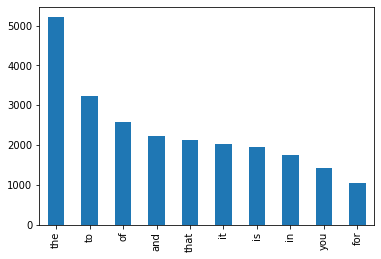

In [15]:
X_science_df.sum().sort_values(ascending=False).head(10).plot(kind='bar');

### Technology

In [16]:
cvect = CountVectorizer()
X_technology = tech_comments['body']
X_technology_vect = cvect.fit_transform(X_technology)
X_technology_df = pd.DataFrame(X_technology_vect.toarray(), columns = cvect.get_feature_names())
X_technology_df.shape

(4486, 11538)

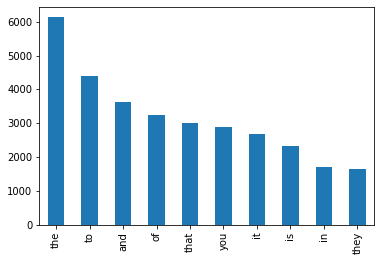

In [17]:
X_technology_df.sum().sort_values(ascending=False).head(10).plot(kind='bar');

### Combined

In [18]:
X_vect = cvect.fit_transform(X)

In [19]:
df = pd.DataFrame(X_vect.toarray(), columns = cvect.get_feature_names())

In [20]:
df.head()

,00,000,0002,00031,00031__0010,00039,0006,001,00135,004,...,趙紫陽,迫害,遊進,運動,達賴喇嘛,還政於民,鎮壓,騷亂,騷擾,魏京生
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(7730, 16594)

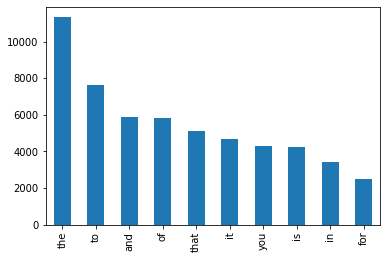

In [22]:
df.sum().sort_values(ascending=False).head(10).plot(kind='bar');

- many of the top words are stopwords

### Stopwords

### Science

In [23]:
cvect_nostopwords = CountVectorizer(stop_words='english')
X_science_nostop = cvect_nostopwords.fit_transform(X_science)
X_science_nostop.shape

(3246, 10136)

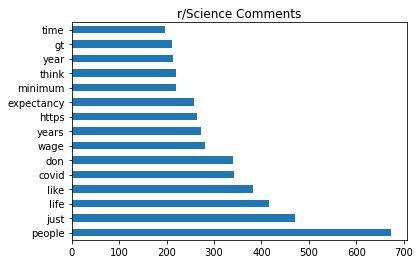

In [24]:
X_science_nostop_df = pd.DataFrame(X_science_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_science_nostop_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.figsize=(20, 20)
plt.title('r/Science Comments');

In [25]:
X_science_nostop_df.sum().sort_values(ascending=False).head(20)

people        672
just          470
life          415
like          383
covid         341
don           339
wage          280
years         273
https         265
expectancy    257
minimum       219
think         219
year          213
gt            212
time          196
know          180
science       171
really        170
amp           169
make          167
dtype: int64

### Technology

In [26]:
cvect_nostopwords = CountVectorizer(stop_words='english')
X_technology_nostop = cvect_nostopwords.fit_transform(X_technology)
X_technology_nostop.shape

(4486, 11250)

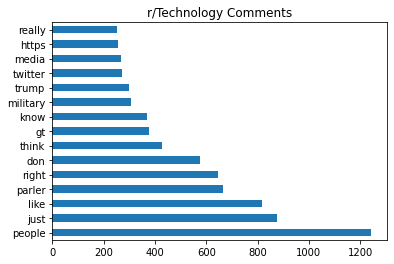

In [27]:
X_technology_nostop_df = pd.DataFrame(X_technology_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_technology_nostop_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.figsize=(20, 20)
plt.title('r/Technology Comments');

In [28]:
X_technology_nostop_df.sum().sort_values(ascending=False).head(20)

people      1244
just         877
like         816
parler       664
right        644
don          577
think        429
gt           378
know         368
military     308
trump        297
twitter      271
media        266
https        256
really       252
did          249
say          244
reddit       238
good         228
make         221
dtype: int64

### Combined

In [29]:
cvect_nostopwords = CountVectorizer(stop_words='english')

In [30]:
X_nostop = cvect_nostopwords.fit_transform(X)

In [31]:
X_nostop.shape

(7730, 16302)

In [32]:
X_vect.shape

(7730, 16594)

- Removed ~300 words

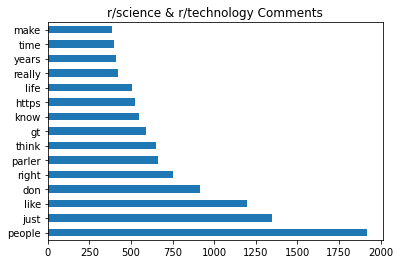

In [33]:
X_nostop_df = pd.DataFrame(X_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_nostop_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.figsize=(20, 20)
plt.title('r/science & r/technology Comments');

In [34]:
X_combined_nostop_df = pd.DataFrame(X_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_combined_nostop_df.sum().sort_values(ascending=False).head(20)

people    1916
just      1347
like      1199
don        916
right      751
parler     664
think      648
gt         590
know       548
https      521
life       508
really     422
years      409
time       395
make       388
way        378
say        378
good       372
doesn      371
did        363
dtype: int64

### N-Grams (both subreddits combined)

In [35]:
#function to return top words in dataframe
def top_words(X, vect):
    df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
    return df.sum().sort_values(ascending=False).head(10)

In [36]:
top_words(X_nostop, cvect_nostopwords)

people    1916
just      1347
like      1199
don        916
right      751
parler     664
think      648
gt         590
know       548
https      521
dtype: int64

In [37]:
#Count Vectorizer with Bigram
cvect_bigram = CountVectorizer(stop_words='english', max_features=500, ngram_range=(2, 2))
X_bigram = cvect_bigram.fit_transform(X)
top_words(X_bigram, cvect_bigram)

https www          257
life expectancy    251
minimum wage       197
social media       174
right wing         163
don know           112
far right           84
don think           80
free speech         80
https en            80
dtype: int64

In [38]:
#Count Vectorizer with Trigram
cvect_trigram = CountVectorizer(stop_words='english', max_features=500, ngram_range=(3, 3))
X_bigram = cvect_trigram.fit_transform(X)
top_words(X_bigram, cvect_trigram)

en wikipedia org         79
https en wikipedia       79
wikipedia org wiki       79
www reddit com           51
https www reddit         38
social media platform    30
np reddit com            26
raise minimum wage       26
https imgur com          24
com message compose      21
dtype: int64